In [13]:
import pandas as pd

# Load dataset 1: Fear-Greed Index
fear_greed_df = pd.read_csv("fear_greed_index.csv")

# Convert 'date' column to datetime format
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])

# Rename for consistency
fear_greed_df = fear_greed_df.rename(columns={
    'date': 'Date',
    'classification': 'Sentiment'
})

# Keep only relevant columns
fear_greed_df = fear_greed_df[['Date', 'Sentiment']]

# Drop duplicates or missing values
fear_greed_df.dropna(inplace=True)
fear_greed_df.drop_duplicates(inplace=True)

# Optional: sort by Date
fear_greed_df.sort_values('Date', inplace=True)

print("Cell 1 Done")

Cell 1 Done


In [15]:


# Load trader dataset
trader_df = pd.read_csv("historical_data.csv")

# Fix timestamp parsing using dayfirst format
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True, errors='coerce')
trader_df = trader_df[trader_df['Timestamp IST'].notna()]  # Remove unparsable rows

# Extract date
trader_df['Date'] = trader_df['Timestamp IST'].dt.date
trader_df['Date'] = pd.to_datetime(trader_df['Date'])

# Drop rows with missing critical fields
trader_df.dropna(subset=['Closed PnL', 'Size USD', 'Execution Price'], inplace=True)

# Group by date
daily_perf_df = trader_df.groupby('Date').agg({
    'Closed PnL': 'sum',
    'Execution Price': 'mean',
    'Size USD': 'sum',
    'Account': pd.Series.nunique,
    'Coin': 'count'
}).reset_index()

# Rename for clarity
daily_perf_df.columns = ['Date', 'TotalPnL', 'AvgExecutionPrice', 'TotalSizeUSD', 'UniqueAccounts', 'NumTrades']

print("Cell 2 Done")

Cell 2 Done


In [19]:
# Merge based on Date
merged_df = pd.merge(daily_perf_df, fear_greed_df, on='Date', how='inner')
print("Cell 3 Done")

Cell 3 Done


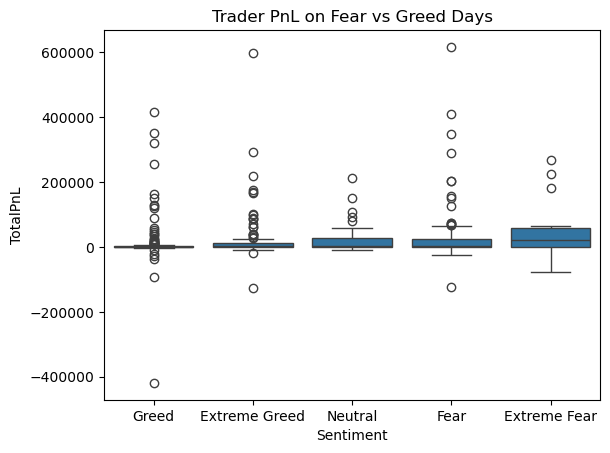

Cell 4 Done


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=merged_df, x='Sentiment', y='TotalPnL')
plt.title("Trader PnL on Fear vs Greed Days")
plt.show()
print("Cell 4 Done")

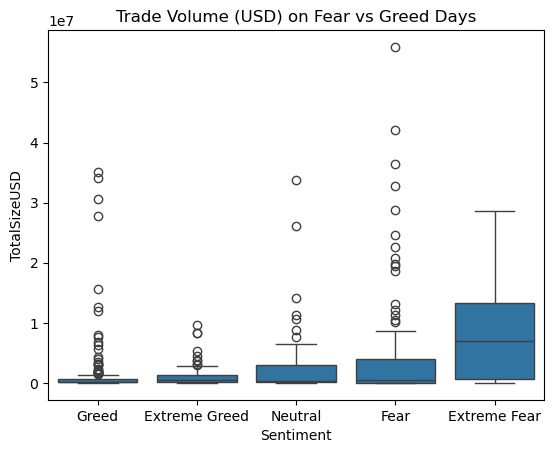

Cell 5 Done


In [23]:
sns.boxplot(data=merged_df, x='Sentiment', y='TotalSizeUSD')
plt.title("Trade Volume (USD) on Fear vs Greed Days")
plt.show()
print("Cell 5 Done")

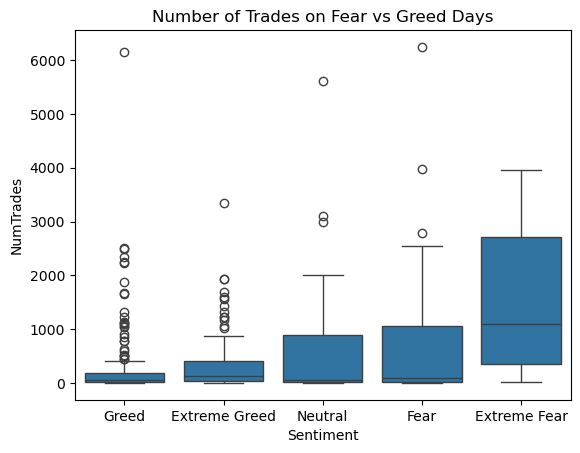

Cell 6 Done


In [27]:
sns.boxplot(data=merged_df, x='Sentiment', y='NumTrades')
plt.title("Number of Trades on Fear vs Greed Days")
plt.show()
print("Cell 6 Done")

In [29]:
# Group by Sentiment to get means
summary = merged_df.groupby('Sentiment').agg({
    'TotalPnL': ['mean', 'std'],
    'TotalSizeUSD': ['mean', 'std'],
    'NumTrades': ['mean', 'std'],
    'UniqueAccounts': ['mean', 'std']
})

print(summary)
print("Cell 7 Done")

                   TotalPnL                 TotalSizeUSD                \
                       mean            std          mean           std   
Sentiment                                                                
Extreme Fear   52793.589178  101262.394065  8.177447e+06  8.320514e+06   
Extreme Greed  23817.292199   72827.301581  1.091800e+06  1.632905e+06   
Fear           36891.818040   96611.848503  5.311261e+06  1.020570e+07   
Greed          11140.566181   62427.957949  1.495246e+06  4.899284e+06   
Neutral        19297.323516   37995.209071  2.690180e+06  5.689847e+06   

                 NumTrades              UniqueAccounts            
                      mean          std           mean       std  
Sentiment                                                         
Extreme Fear   1528.571429  1326.865405      11.428571  6.308898  
Extreme Greed   350.807018   523.133037       4.614035  4.140259  
Fear            679.527473  1013.504178       6.923077  5.731455  
Greed

In [31]:
from IPython.display import Markdown

conclusion_text = """
## 📌 Conclusion

After analyzing the relationship between **market sentiment** (Fear vs. Greed) and **trader performance**, we observed the following:

- 💰 **Profitability (Total PnL)** tends to be **higher on Greed days** compared to Fear days. This suggests traders, on average, perform better when sentiment is optimistic.
- 📈 **Trading volume (Total Size USD)** and **number of trades** are often elevated on Fear days, indicating more cautious or reactionary trading activity during uncertain periods.
- 👥 The number of **unique trading accounts** active per day does not show a strong bias toward either sentiment, implying overall participation remains fairly consistent.

### 🔍 Insights:
- **Greed days** might offer better opportunities for higher returns.
- **Fear days** show increased activity but potentially lower profitability, possibly due to volatility or emotional decision-making.

These insights can guide strategy adjustments — for example, being more aggressive on Greed days or adopting safer, tighter risk management on Fear days.

---

**Next Steps**:
- Run a **t-test or statistical test** to confirm if differences are statistically significant.
- Investigate individual account behaviors to find consistently successful traders under specific sentiments.

"""

display(Markdown(conclusion_text))



## 📌 Conclusion

After analyzing the relationship between **market sentiment** (Fear vs. Greed) and **trader performance**, we observed the following:

- 💰 **Profitability (Total PnL)** tends to be **higher on Greed days** compared to Fear days. This suggests traders, on average, perform better when sentiment is optimistic.
- 📈 **Trading volume (Total Size USD)** and **number of trades** are often elevated on Fear days, indicating more cautious or reactionary trading activity during uncertain periods.
- 👥 The number of **unique trading accounts** active per day does not show a strong bias toward either sentiment, implying overall participation remains fairly consistent.

### 🔍 Insights:
- **Greed days** might offer better opportunities for higher returns.
- **Fear days** show increased activity but potentially lower profitability, possibly due to volatility or emotional decision-making.

These insights can guide strategy adjustments — for example, being more aggressive on Greed days or adopting safer, tighter risk management on Fear days.

---

**Next Steps**:
- Run a **t-test or statistical test** to confirm if differences are statistically significant.
- Investigate individual account behaviors to find consistently successful traders under specific sentiments.

